# Sklearn

## sklearn.metrics

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
from sklearn import datasets, linear_model, metrics
from sklearn import model_selection as mod_sel

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

%matplotlib inline

### Генерация датасетов

In [55]:
clf_data, clf_target = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 7)

In [56]:
reg_data, reg_target = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                                noise = 5., random_state = 7)

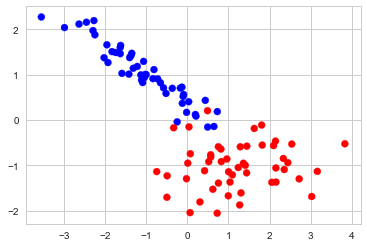

In [57]:
colors = ListedColormap(['red', 'blue'])
plt.scatter(list(map(lambda x: x[0], clf_data)), list(map(lambda x: x[1], clf_data)), c = clf_target, cmap = colors)

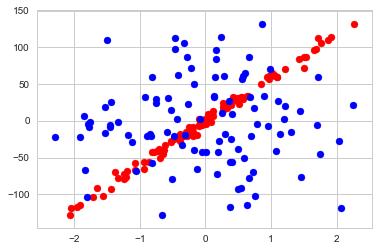

In [5]:
plt.scatter(list(map(lambda x:x[1], reg_data)), reg_target, color = 'r')
plt.scatter(list(map(lambda x:x[0], reg_data)), reg_target, color = 'b')

In [6]:
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = mod_sel.train_test_split(
    clf_data, clf_target,
    test_size = 0.3, random_state = 1
)

In [7]:
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = mod_sel.train_test_split(
    reg_data, reg_target,
    test_size = 0.3, random_state = 1
)

### Метрики качества в задачах классификации

#### Обучение модели классификации

In [13]:
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1, max_iter=1000, tol=1e-3)

In [14]:
classifier.fit(clf_train_data, clf_train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=0.001, verbose=0, warm_start=False)

In [15]:
predictions = classifier.predict(clf_test_data)

In [16]:
probability_predictions = classifier.predict_proba(clf_test_data)

In [17]:
print(clf_test_labels)

[1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0]


In [18]:
print(predictions)

[1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0]


In [19]:
print(probability_predictions)

[[0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 9.55294784e-11]
 [9.99965597e-01 3.44025941e-05]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 6.04057868e-15]
 [2.15640816e-09 9.99999998e-01]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.11160611e-15]
 [0.00000000e+00 1.00000000e+00]
 [9.99999997e-01 3.44139018e-09]
 [9.99999923e-01 7.72540989e-08]
 [1.97506508e-05 9.99980249e-01]
 [0.00000000e+00 1.00000000e+00]
 [8.31268387e-12 1.00000000e+00]
 [1.00000000e+00 9.65627208e-11]
 [6.67463765e-01 3.32536235e-01]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.83115131e-17]
 [1.00000000e+00 1.03051629e-16]
 [1.86517468e-14 1.00000000e+00]
 [1.00000000e+00 3.48019384e-10]
 [9.99999804e-01 1.96381273e-07]
 [1.96671741e-02 9.80332826e-01]
 [1.00000000e+00 9.24209073e-13]
 [9.99999426e-01 5.74251856e-07]
 [8.81376117e-01 1.18623883e-01]
 [2.36828023e-01 7.63171977e-01]
 [1.99840144e-15 1.00000000e+00]
 [1.05787229e-03 9.98942128e-01]
 [1.00000000e+00 1.63911119e-15]]


#### accuracy

In [20]:
sum([1. if pair[0] == pair[1] else 0. for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)

0.9333333333333333

In [21]:
metrics.accuracy_score(clf_test_labels, predictions)

0.9333333333333333

#### confusion matrix

In [22]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print(matrix)

[[16  2]
 [ 0 12]]


In [23]:
sum([1 if pair[0] == pair[1] else 0 for pair in zip(clf_test_labels, predictions)])

28

In [24]:
matrix.diagonal().sum()

28

#### precision 

In [25]:
metrics.precision_score(clf_test_labels, predictions, pos_label = 0)

1.0

In [26]:
metrics.precision_score(clf_test_labels, predictions)

0.8571428571428571

#### recall

In [27]:
metrics.recall_score(clf_test_labels, predictions, pos_label = 0)

0.8888888888888888

In [28]:
metrics.recall_score(clf_test_labels, predictions)

1.0

#### f1

In [29]:
metrics.f1_score(clf_test_labels, predictions, pos_label = 0)

0.9411764705882353

In [30]:
metrics.f1_score(clf_test_labels, predictions)

0.923076923076923

#### classification report

In [31]:
print(metrics.classification_report(clf_test_labels, predictions))

             precision    recall  f1-score   support

          0       1.00      0.89      0.94        18
          1       0.86      1.00      0.92        12

avg / total       0.94      0.93      0.93        30



#### ROC curve

In [33]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])

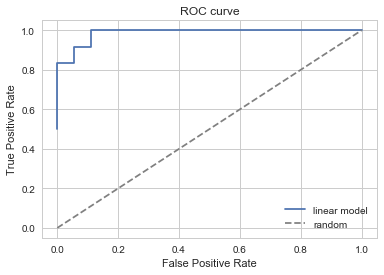

In [34]:
plt.plot(fpr, tpr, label = 'linear model')
plt.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = "lower right")

#### ROC AUC

In [35]:
metrics.roc_auc_score(clf_test_labels, predictions)

0.9444444444444444

In [36]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

0.986111111111111

#### PR AUC

In [37]:
metrics.average_precision_score(clf_test_labels, predictions)

0.8571428571428571

#### log_loss

In [38]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

0.5187678334498796

### Метрики качества в задачах регрессии

#### Обучение регрессионной модели 

In [44]:
regressor = linear_model.SGDRegressor(random_state = 1, max_iter=1000, tol=1e-3)

In [45]:
regressor.fit(reg_train_data, reg_train_labels)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=1, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [46]:
reg_predictions = regressor.predict(reg_test_data)

In [48]:
print(reg_test_labels)

[   2.67799047    7.06525927  -56.43389936   10.08001896  -22.46817716
  -19.27471232   59.44372825  -21.60494574   32.54682713  -41.89798772
  -18.16390935   32.75688783   31.04095773    2.39589626   -5.04783924
  -70.20925097   86.69034305   18.50402992   32.31573461 -101.81138022
   15.14628858   29.49813932   97.282674     25.88034991  -41.63332253
  -92.11198201   86.7177122     2.13250832  -20.24967575  -27.32511755]


In [49]:
print(reg_predictions)

[ -1.13246149   6.7736406  -51.83796126   5.57569752 -24.1699092
  -8.23782283  64.2250831  -22.06066215  32.09523995 -40.43663313
 -17.57068622  32.52047328  28.56373406  -6.21687013  -2.90663393
 -81.91830627  88.6158914   16.10976794  24.40506098 -92.99999304
  15.66750338  33.44607289 100.1034759   23.05530037 -44.69149156
 -98.60069474  90.37862825   0.96698228 -16.54355132 -23.70824291]


#### mean absolute error

In [50]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

3.723801566253729

#### mean squared error

In [51]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

23.43444329791779

#### root mean squared error

In [53]:
from math import sqrt 
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

4.840913477631861

#### r2 score

In [54]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.9896190538396834